Messo in questa directory temporaneamente perchè non mi funziona l'import per la funzione *read_data*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os

import sklearn
from sklearn.cluster import KMeans

In [3]:
X_LABEL = "X_LABEL"
Y_LABEL = "Y_LABEL"
LOG_SCALE = "LOG_SCALE"

def get_data_sorted(name, data):
    """
    Takes the dataset and the name of column on which it sorts
    return python, matlab dataset
    """
    data = data.sort_values(by=[name])  # sort sulle dimensioni delle matrici in ordine crescente
    data_python = data.loc[data['Language'] == 1]
    data_matlab = data.loc[data['Language'] == 0]
    return data_python, data_matlab


def read_data(name):
    from Analysis.resources.costants import RESOURCES_DIRECTORY
    path = os.path.join(RESOURCES_DIRECTORY, name)
    return pd.read_csv(path)


def write_data(df, name):
    from Analysis.resources.costants import RESOURCES_DIRECTORY
    path = os.path.join(RESOURCES_DIRECTORY, name)
    df.to_csv(path, index=False)

def plot(labels, data_py, data_matlab, x_name, y_name, title, legend1, legend2, **keywords):

    figure(figsize=(20, 6), dpi=80)
    title = title + " " + "(Line Plot)"

    plt.plot(labels, data_py, label=legend1, linestyle="-")
    plt.plot(labels, data_matlab, label=legend2, linestyle="--")
    show(x_name, y_name, title, **keywords)


def bar_plot(labels, data_py, data_matlab, x_name, y_name, title, legend1, legend2, **keywords):
    figure(figsize=(20, 6), dpi=80)
    title = title + " " + "(Bar Plot)"

    x_axis = np.arange(len(labels))

    # Multi bar Chart

    plt.bar(x_axis -0.2, data_py, width=0.4, label = legend1)
    plt.bar(x_axis +0.2, data_matlab, width=0.4, label = legend2)

    # Xticks

    plt.xticks(x_axis, labels)
    show(x_name, y_name, title, **keywords)



def show(x_name, y_name, title, **keywords):

    x_label, y_label = "", ""
    if X_LABEL in keywords.keys():
        x_label = f"({keywords[X_LABEL]})"
    if Y_LABEL in keywords.keys():
        y_label = f"({keywords[Y_LABEL]})"
    if LOG_SCALE in keywords.keys():
        plt.yscale('log') # logarithmic scale

    plt.xlabel(f"{x_name} {x_label}",  labelpad=15, fontsize=12, color="#333533")
    plt.ylabel(f"{y_name} {y_label}",  labelpad=15, fontsize=12, color="#333533")
    plt.title(title, fontsize=18, color="#333533", pad=35)

    # removing axes from the figure
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.legend(loc='upper center',ncol=2,frameon=False)
    plt.show()


def correlation(x, y, x_name, y_name):
    figure(figsize=(20, 6), dpi=80)
    title = f"Scatter-plot variables '{x_name}' and '{y_name}'"
    my_rho = np.corrcoef(x, y) # Correlation Coefficient
    print(my_rho)

    plt.xscale('log')
    plt.yscale('log')
    plt.scatter(x, y)
    plt.plot(x, y, color = "g")
    show(x_name, y_name, title)



In [4]:
data = pd.read_csv("data.csv")

# drops rows with duplicat Name, since conditioning and nnz is the same
unique_data = data.drop_duplicates(subset='Name', keep="first")
unique_data


,Name,Rows,Columns,Error,Memory,Time,Language,OS,Nnz,Cond
0,apache2,715176,715176,2.235941e-08,0.004471,66.232192,1,0,4817870,5.316861e+06
4,cfd1,70656,70656,6.628463e-12,0.003326,4.461982,1,0,1825580,1.335081e+06
8,cfd2,123440,123440,1.334161e-10,0.003326,10.917099,1,0,3085406,3.728473e+06
12,ex15,6867,6867,5.281170e-05,0.003326,0.015078,1,0,98671,1.432642e+13
16,G3_circuit,1585478,1585478,3.452568e-09,210.620559,27.939265,1,0,7660826,2.238425e+07
20,parabolic_fem,525825,525825,8.836779e-10,0.003326,6.439602,1,0,3674625,2.110820e+05
24,shallow_water1,81920,81920,6.923992e-14,9.067514,0.615064,1,0,327680,3.628000e+00


Il file *data_aggregation.csv* contiene un'aggregazione dei dati delle matrici, con le proprietà fisse che restano invariate, mentre time error e memory, che variano a seconda di OS e linguaggio, vengono aggregate attraverso una media

Ne scaturisce una tabella di 7 righe: una per ciascuna matrice, senza righe duplicate

Sarà utile in seguito per alcune analisi effettuate, soprattuto il clustering

In [12]:
data = pd.read_csv("data.csv")
unique_data = data.drop_duplicates(subset='Name', keep="first")
matrix_names = unique_data.Name.tolist()
agg_data = pd.DataFrame(columns=["Name", "Rows", "avgError", "avgMemory", "avgTime", "Nnz", "Cond"])

for i in range(len(matrix_names)):
    name = unique_data.iloc[i].Name
    sub_data = data[data.Name == name]
    sub_data
    agg_data.loc[i] = [unique_data.iloc[i].Name, unique_data.iloc[i].Rows, sub_data["Error"].mean(), sub_data["Memory"].mean(), 
                        sub_data["Time"].mean(), unique_data.iloc[i].Nnz, unique_data.iloc[i].Cond]

agg_data.to_csv("data_aggregation.csv", index=False)
agg_data

,Name,Rows,avgError,avgMemory,avgTime,Nnz,Cond
0,apache2,715176,1.120165e-08,1444.600346,44.545248,4817870,5.316861e+06
1,cfd1,70656,3.371027e-12,296.911774,3.781485,1825580,1.335081e+06
2,cfd2,123440,6.687547e-11,583.295888,9.181369,3085406,3.728473e+06
3,ex15,6867,2.672326e-05,1.571187,0.023189,98671,1.432642e+13
4,G3_circuit,1585478,1.728072e-09,1669.203346,25.034213,7660826,2.238425e+07
5,parabolic_fem,525825,4.423640e-10,286.514813,5.170140,3674625,2.110820e+05
6,shallow_water1,81920,3.475360e-14,12.659260,0.469546,327680,3.628000e+00


# Come cresce l'Errore Relativo al crescere del Condizionamento?

Qui vengono mostrati Plot e Barplot, e successivamente nel dettaglio il cofficiente di correlazione, nelle 4 combinazioni linguaggio-OS 

(Terrei entrambe le tipologie di grafico per la documentazione Latex)

Come ci si poteva aspettare, la crescita dell'errore è direttamente proporzionale alla crescita del condizionamento della matrice: per questo ex15, pur essendo la matrice più piccola, è quella con errore più grande

(Dal momento che il condizionamento è stato calcolato su MATLAB, l'errore considerato è quello di MATLAB, OS Windows ma era indifferente dal momento che le analisi hanno evidenziato che gli errori non cambiano tra diversi OS)

C:\Users\simon\AppData\Local\Temp\ipykernel_3156\2854924648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.sort_values(by="Cond", inplace=True)


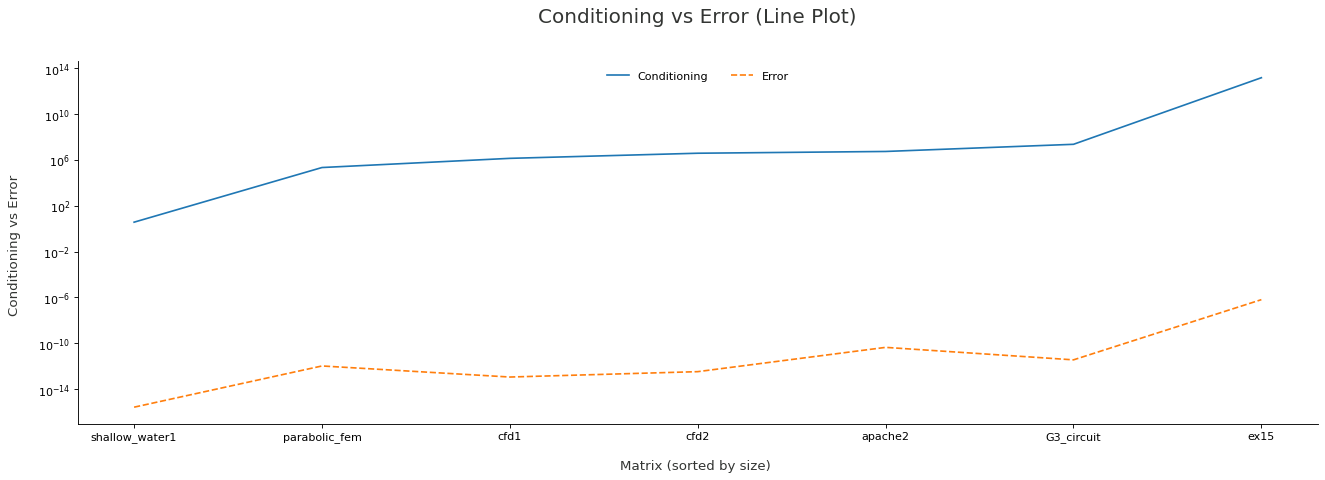

In [19]:
sub_data = data[(data.OS == 0) & (data.Language == 0)]

sub_data.sort_values(by="Cond", inplace=True)

cond_list = sub_data.Cond.tolist()
error_list = sub_data.Error.tolist()

matrix_names = sub_data.Name.tolist()

plot(matrix_names, cond_list, error_list, "Matrix (sorted by size)", "Conditioning vs Error", "Conditioning vs Error", "Conditioning", "Error", LOG_SCALE=True)

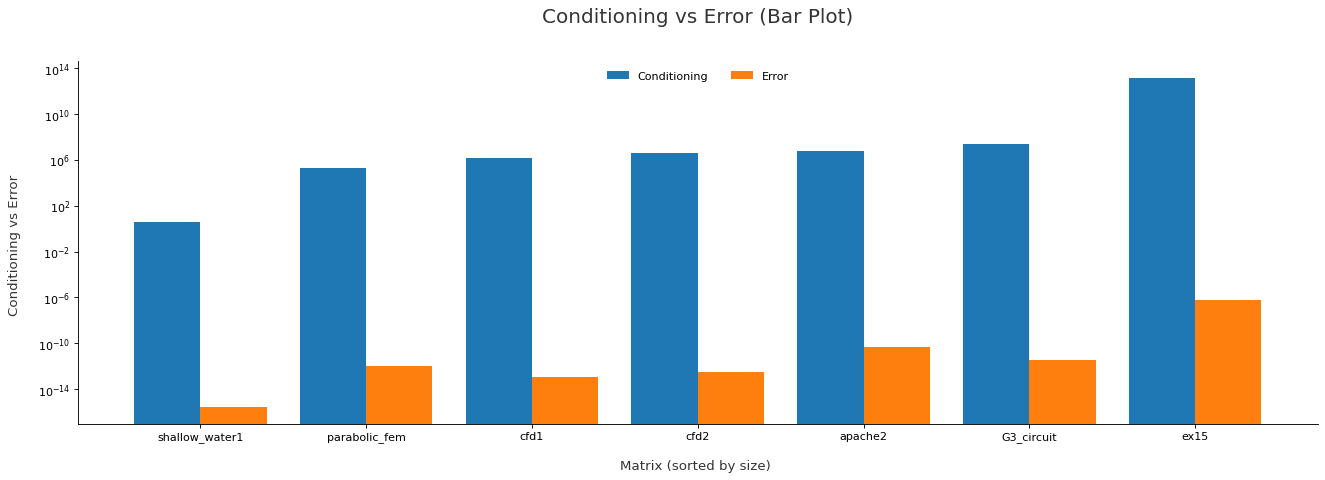

In [20]:
bar_plot(matrix_names, cond_list, error_list, "Matrix (sorted by size)", "Conditioning vs Error", "Conditioning vs Error", "Conditioning", "Error", LOG_SCALE=True)

## Coefficiente di Correlazione

0.92 per Python e 1 per MATLAB

Il Sistema Operativo non fa differenza

In [5]:
data = pd.read_csv("data.csv")
data.sort_values(by="Rows", ascending=True, inplace=True)

data_mat = data[data.Language == 0]
data_mat_win = data_mat[data_mat.OS == 0]
data_mat_lin = data_mat[data_mat.OS == 1]

data_py = data[data.Language == 1]
data_py_win = data_py[data_py.OS == 0]
data_py_lin = data_py[data_py.OS == 1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[1. 1.]
 [1. 1.]]


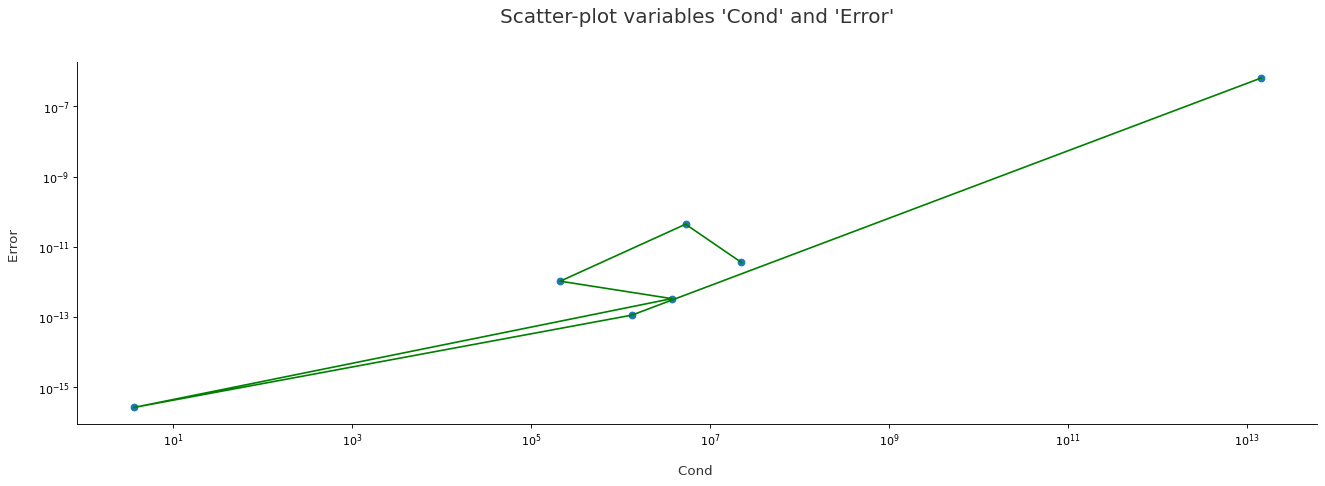

In [6]:
x = np.array(data_mat_lin['Cond'])
y = np.array(data_mat_lin['Error'])

correlation(x, y, "Cond", "Error")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[1. 1.]
 [1. 1.]]


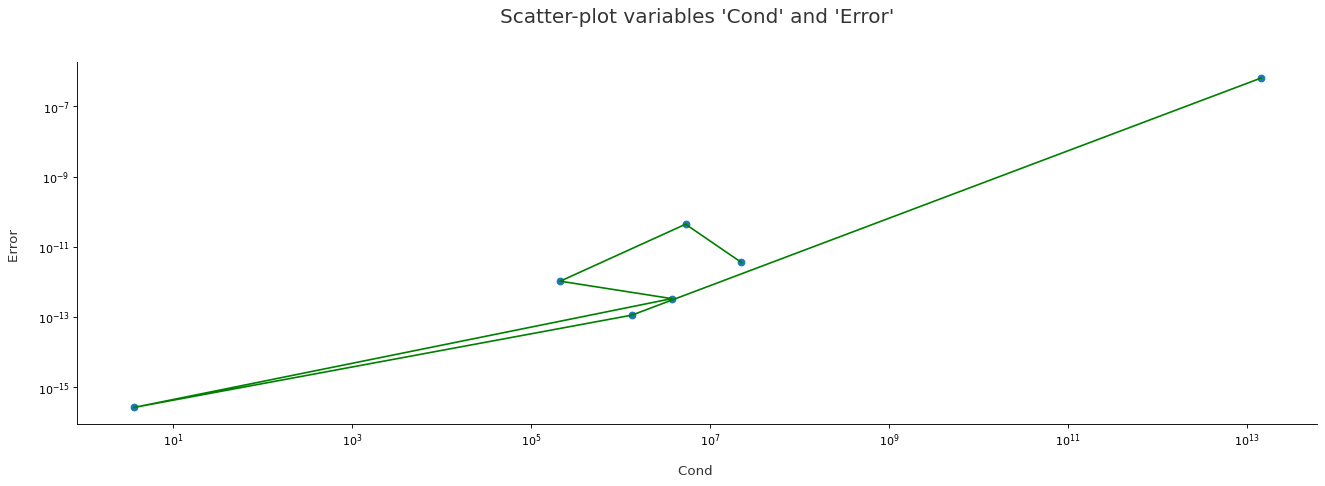

In [7]:
x = np.array(data_mat_win['Cond'])
y = np.array(data_mat_win['Error'])

correlation(x, y, "Cond", "Error")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[1.         0.99999992]
 [0.99999992 1.        ]]


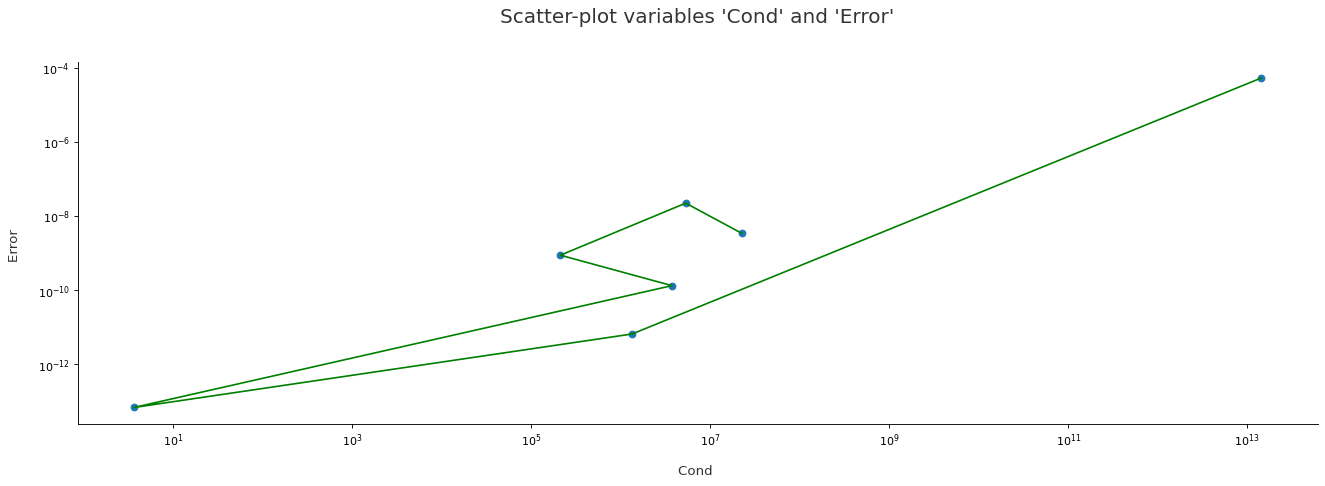

In [8]:
x = np.array(data_py_lin['Cond'])
y = np.array(data_py_lin['Error'])

correlation(x, y, "Cond", "Error")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[1.         0.99999992]
 [0.99999992 1.        ]]


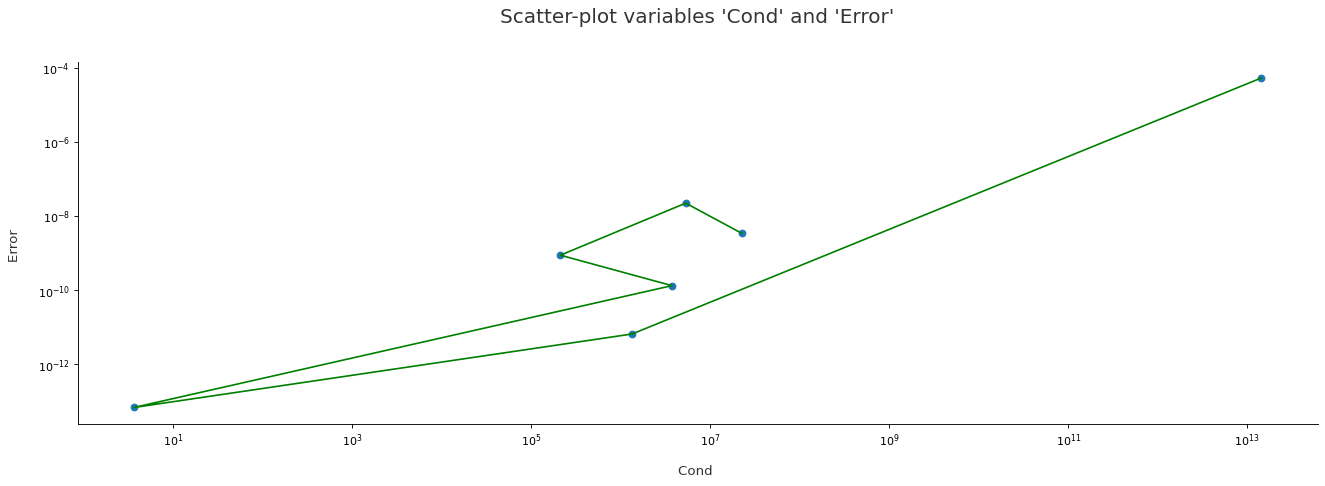

In [9]:
x = np.array(data_py_win['Cond'])
y = np.array(data_py_win['Error'])

correlation(x, y, "Cond", "Error")

# Come aumenta il tempo di esecuzione in relazione alla Densità della Matrice?

Dalle analisi precedenti è emerso come il tempo di esecuzione non dipenda solamente dalla dimensione della matrice, ma anche dalla forma che i dati al suo interno assumono: una matrice grande, i cui dati sono distribuiti attorno alla diagonale principale, richiede meno tempo di una più piccola, i cui dati sono però più dispersi

Con questa analisi l'obiettivo è quello di capire se questa distribuzione dei dati è esprimibile attraverso un valore numerico, e verrà quindi analizzato se c'è una correlazione causale tra la densità della matrice (data dal rapporto dei valori non-zeri e la dimensione dell'intera matrice) e il tempo di esecuzione necessario per applicarvi la decomposizione di Cholesky

Non sembra però esserci correlazione, il che è dovuto al fatto che le matrici più dense risultano essere proprio quelle di dimensioni minori, e pertanto richiedono tempo minore di esecuzione nonostante il rapporto di valori diversi da zero rispetto al totale è più alto in proporzione

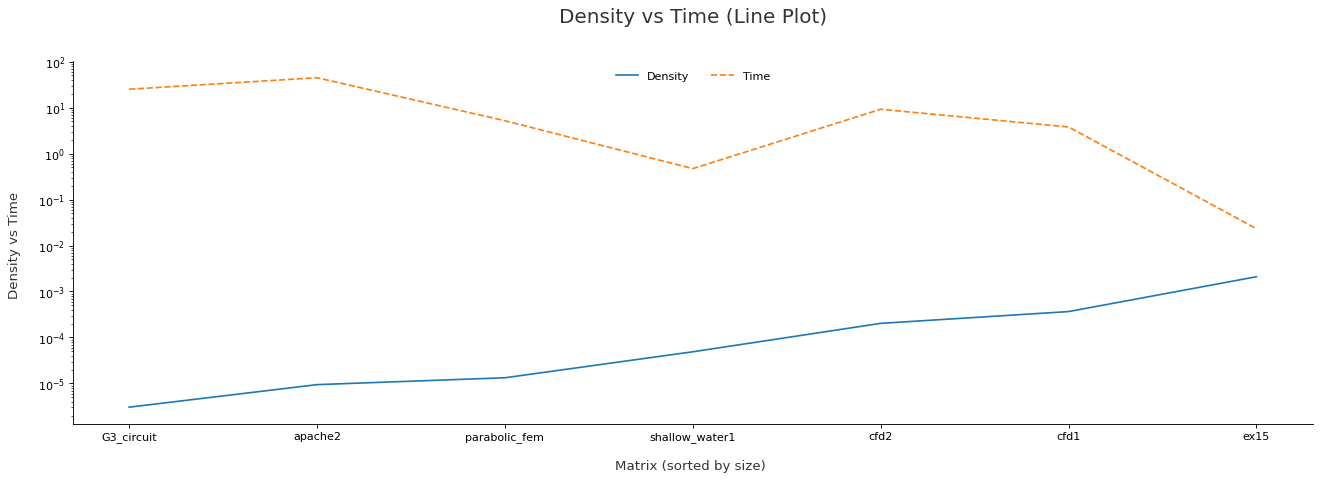

In [13]:
agg_data["Density"] = agg_data.Nnz / ((agg_data.Rows)**2)
agg_data.head(len(agg_data))

agg_data.sort_values(by="Density", inplace=True)
agg_data


density_list = agg_data.Density.tolist()
time_list = agg_data.avgTime.tolist()

matrix_names = agg_data.Name.tolist()

plot(matrix_names, density_list, time_list, "Matrix (sorted by size)", "Density vs Time", "Density vs Time", "Density", "Time", LOG_SCALE=True)

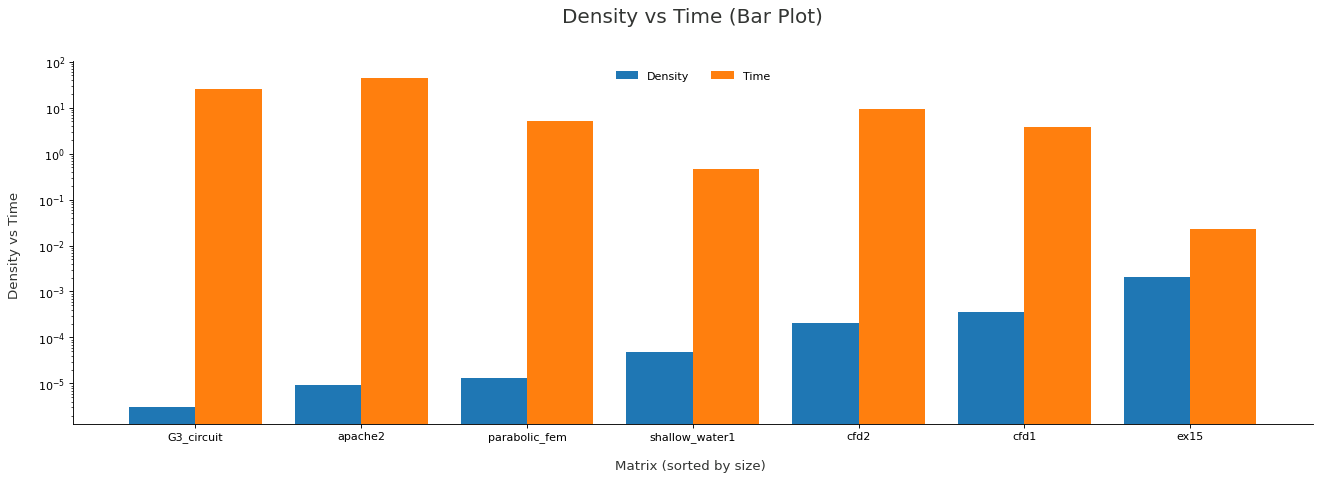

In [14]:
bar_plot(matrix_names, density_list, time_list, "Matrix (sorted by size)", "Density vs Time", "Density vs Time", "Density", "Time", LOG_SCALE=True)

## Coefficiente di Correlazione

# Clustering delle Matrici

Tentativo di usare Clustering sulle matrici, per analizzare la suddivisione automatica scaturita da un k-means, con una conseguente interpretazione dei cluster scaturiti

L'algoritmo è stato provato sia con *k=3* che *k=4*, ma il secondo dà risultati più sensati

L'attributo Cond è stato rimosso, perchè sfasava tutto

**(Piccole)**: *ex15* ed *shallow_water* sono tra le più piccole, e inoltre hanno una forma simile, con i dati distribuiti attorno alla diagonale principale, quindi ci sta che siano insieme

**(Medie)**: *cfd1* e *cfd2* si trovano insieme, il che era prevedibile essendo due matrci molto simili, sia per dimensioni che forma

**(Grandi)**: *parabolic_fem* si trova isolata insieme ad *apache2*, il che va bene, dal momento che sono quelle con la forma più particolare, dimensioni simili 

**(Molto Grande)**: *G3* resta isolato, e ha senso perchè è la più grande, ha una forma particolare e poche proprietà in comune con le altre

Il clustering risultante sembra essere fatto molto bene, in quanto non si sofferma a classificare le matrici esclusivamente in base alla loro dimensione, ma tiene conto anche delle altre proprietà delle matrici, come dimostarto dal fatto che sebbene *cfd1* sia leggermente più piccola di *shallow_water*, si trova comunque nel cluster assieme alla matrice "sorella" *cfd2*


In [11]:
# Convert DataFrame to matrix
clustering_data = agg_data.drop(columns=['Name', 'Cond'])
mat = clustering_data.values

# Using sklearn
km = sklearn.cluster.KMeans(n_clusters=4)
km.fit(mat)

# Get cluster assignment labels
labels = km.labels_

# Format results as a DataFrame
agg_data["cluster"] = labels
agg_data.sort_values(by="cluster", inplace=True)
agg_data

,Name,Rows,avgError,avgMemory,avgTime,Nnz,Cond,Density,cluster
6,shallow_water1,81920,3.475360e-14,12.659260,0.469546,327680,3.628000e+00,0.000049,0
3,ex15,6867,2.672326e-05,1.571187,0.023189,98671,1.432642e+13,0.002092,0
0,apache2,715176,1.120165e-08,1444.600346,44.545248,4817870,5.316861e+06,0.000009,1
5,parabolic_fem,525825,4.423640e-10,286.514813,5.170140,3674625,2.110820e+05,0.000013,1
4,G3_circuit,1585478,1.728072e-09,1669.203346,25.034213,7660826,2.238425e+07,0.000003,2
2,cfd2,123440,6.687547e-11,583.295888,9.181369,3085406,3.728473e+06,0.000202,3
1,cfd1,70656,3.371027e-12,296.911774,3.781485,1825580,1.335081e+06,0.000366,3
